# Filtros Espaciais em Imagens Médicas: Suavização e Realce

## Objetivos da Aula

Ao final desta atividade, você será capaz de:
- Aplicar filtros espaciais de suavização e aguçamento em imagens médicas
- Analisar o impacto dos filtros na qualidade da imagem

## Cenário Clínico
Vocês são técnicos em processamento de imagens médicas em um hospital universitário. A equipe de radiologia solicitou pré-processamento de diferentes exames para facilitar o diagnóstico. Cada grupo deverá escolher um conjunto de 5 imagens, sendo uma com ruído.

## Roteiro da Atividade FASE 1
Análise do Caso Clínico Tarefa do seu grupo:
- Carregue a imagem médica atribuída ao seu grupo
- Analise visualmente a imagem original

## FASE 2
Implementação dos Filtros 
Implemente duas técnicas diferentes para seu caso:
- Filtros de Suavização (para reduzir ruído):
    - Filtro de Média 
    - Filtro de Mediana 
- Filtros de Aguçamento (para realçar detalhes): 
    - Filtro Laplaciano 
    - Filtro Sobel (detecção de bordas)

####  O que fazer:
Aplique cada filtro na imagem original
Ajuste os parâmetros (tamanho do kernel) conforme necessário
Salve os resultados para comparação

## FASE 3: Análise Comparativa
Para cada filtro aplicado, avalie através de analise visual:
- O ruído foi reduzido adequadamente?
- As bordas importantes foram preservadas?
- Houve perda de detalhes relevantes?
- A imagem ficou mais adequada para diagnóstico?

[ WARN:0@2999.230] global loadsave.cpp:275 findDecoder imread_('images/renamed1.png'): can't open/read file: check file path/integrity
[ WARN:0@2999.235] global loadsave.cpp:275 findDecoder imread_('images/renamed3.png'): can't open/read file: check file path/integrity
[ WARN:0@2999.235] global loadsave.cpp:275 findDecoder imread_('images/renamed4.png'): can't open/read file: check file path/integrity
[ WARN:0@2999.236] global loadsave.cpp:275 findDecoder imread_('images/renamed5.png'): can't open/read file: check file path/integrity
[ WARN:0@2999.236] global loadsave.cpp:275 findDecoder imread_('images/renamed6.png'): can't open/read file: check file path/integrity
[ WARN:0@2999.251] global loadsave.cpp:275 findDecoder imread_('images/renamed13.png'): can't open/read file: check file path/integrity
[ WARN:0@2999.253] global loadsave.cpp:275 findDecoder imread_('images/renamed14.png'): can't open/read file: check file path/integrity
[ WARN:0@2999.253] global loadsave.cpp:275 findDecode

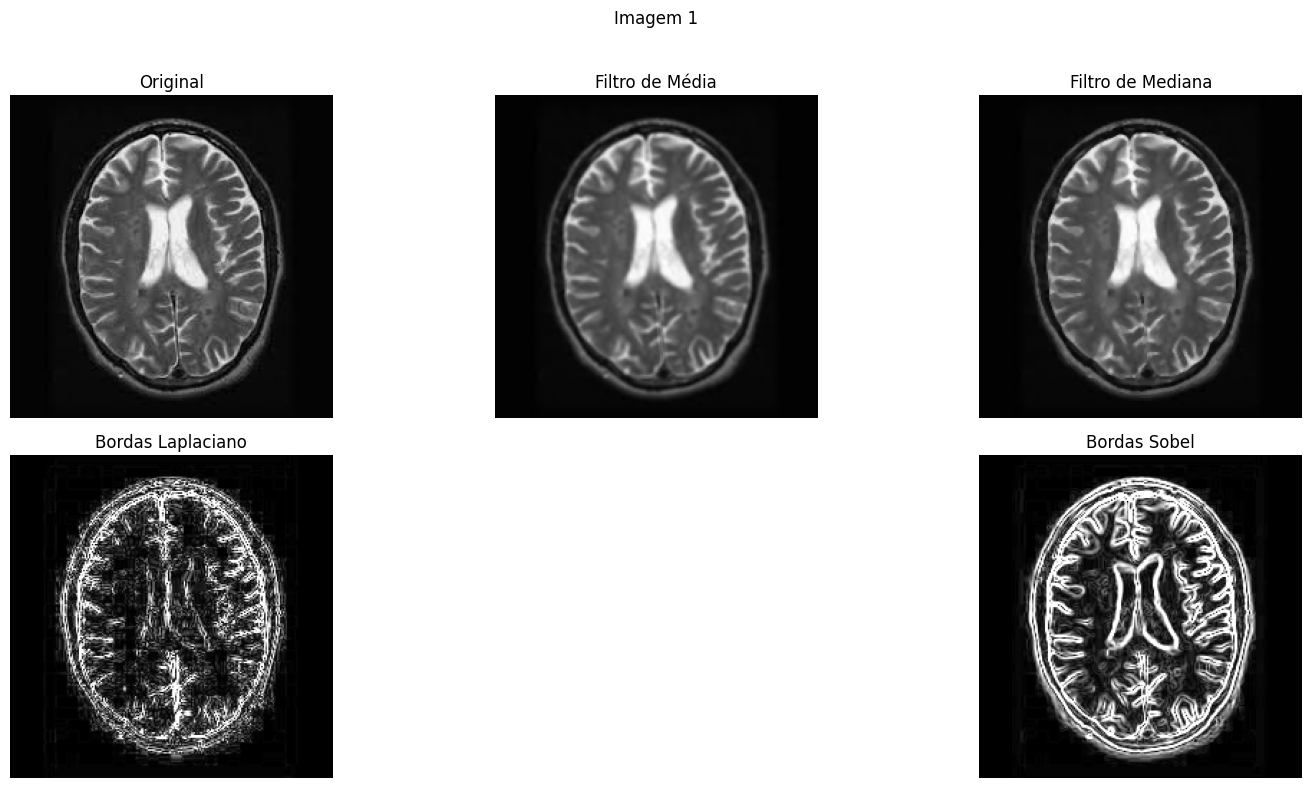

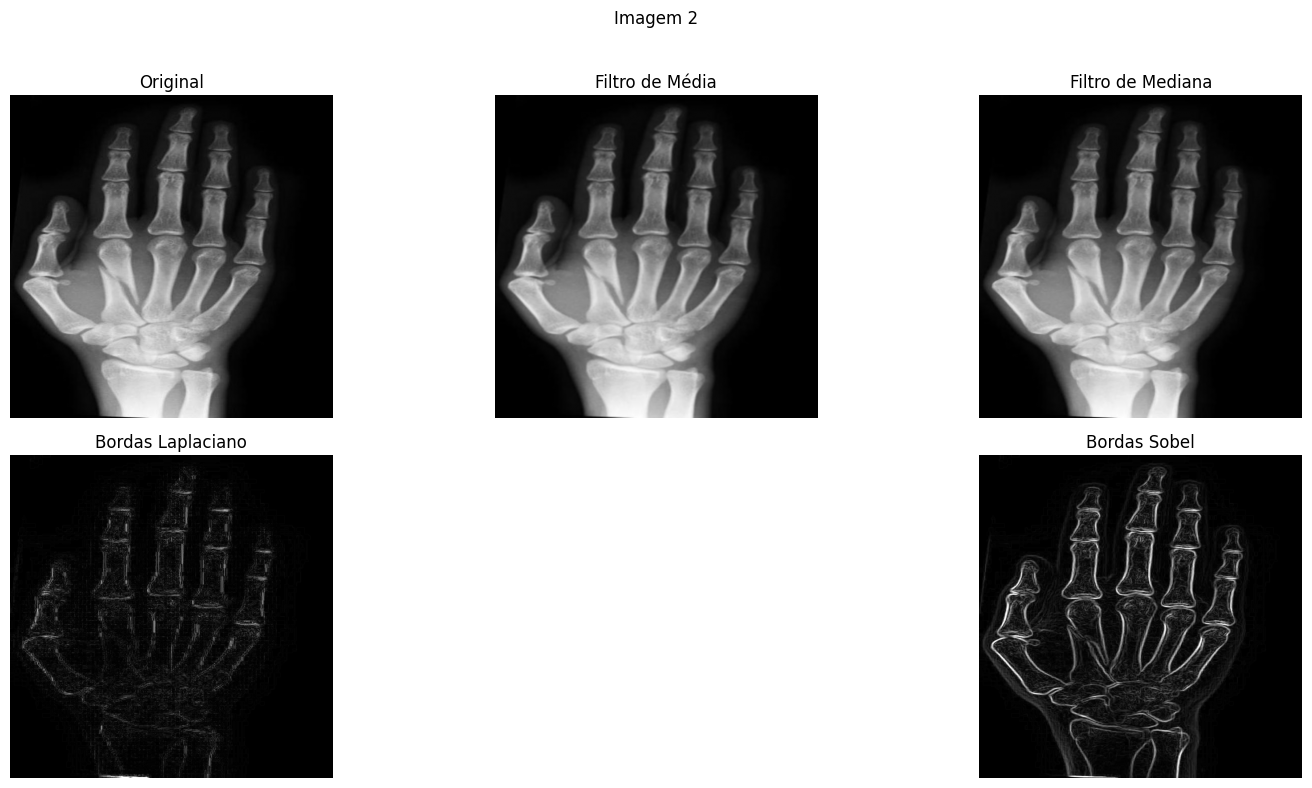

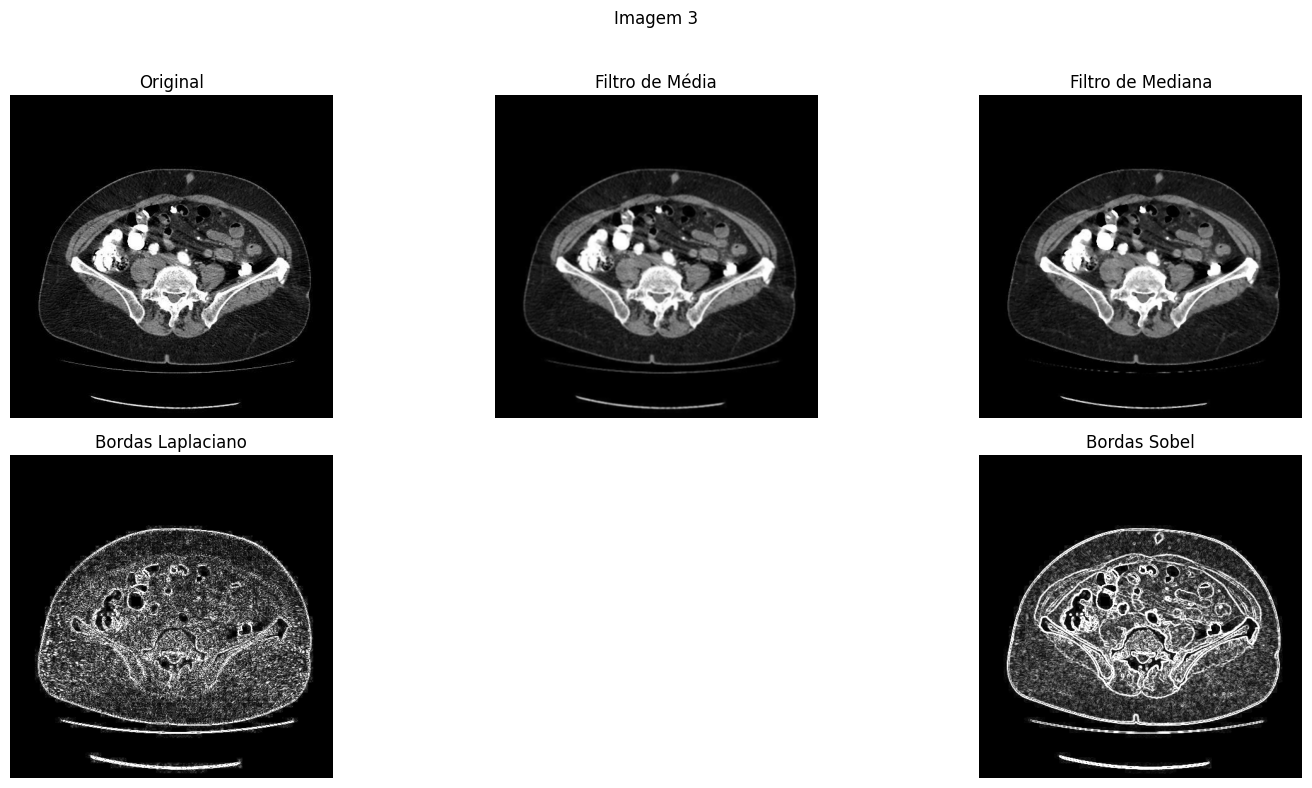

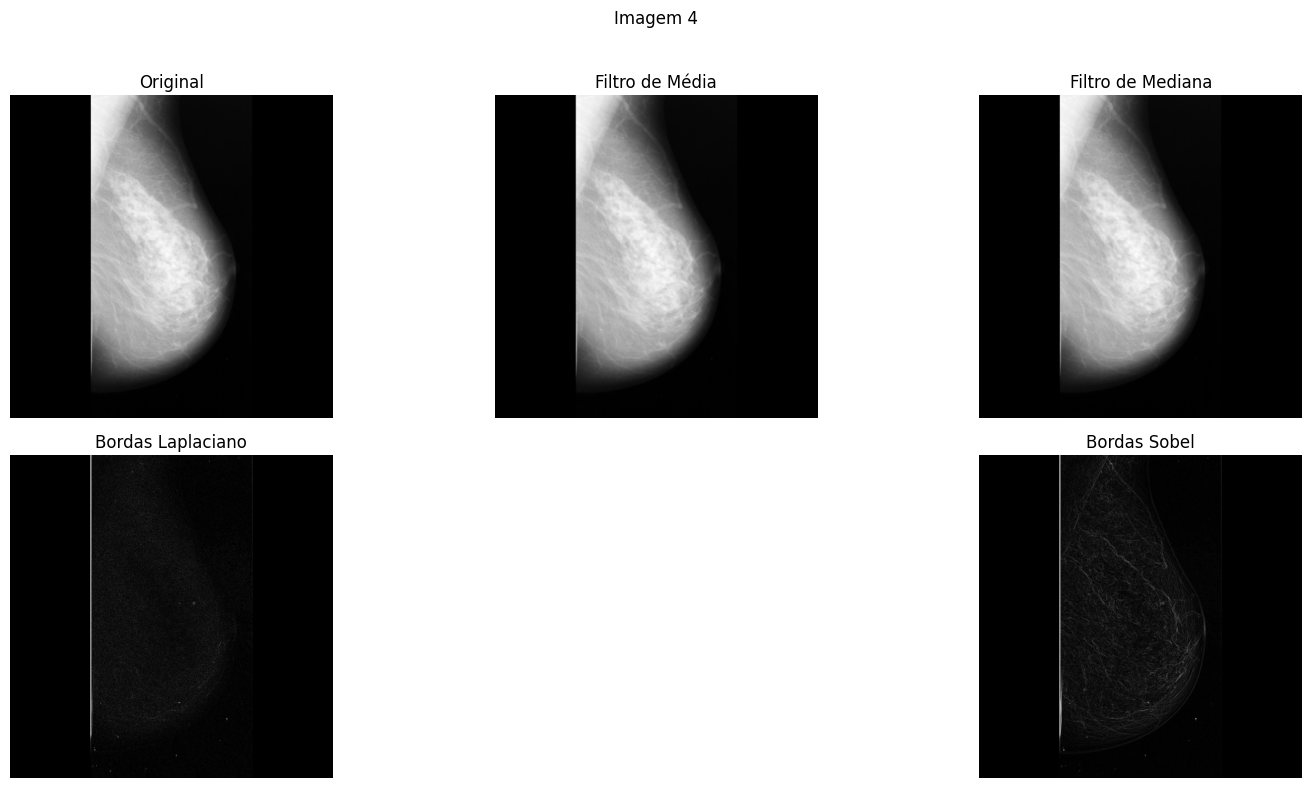

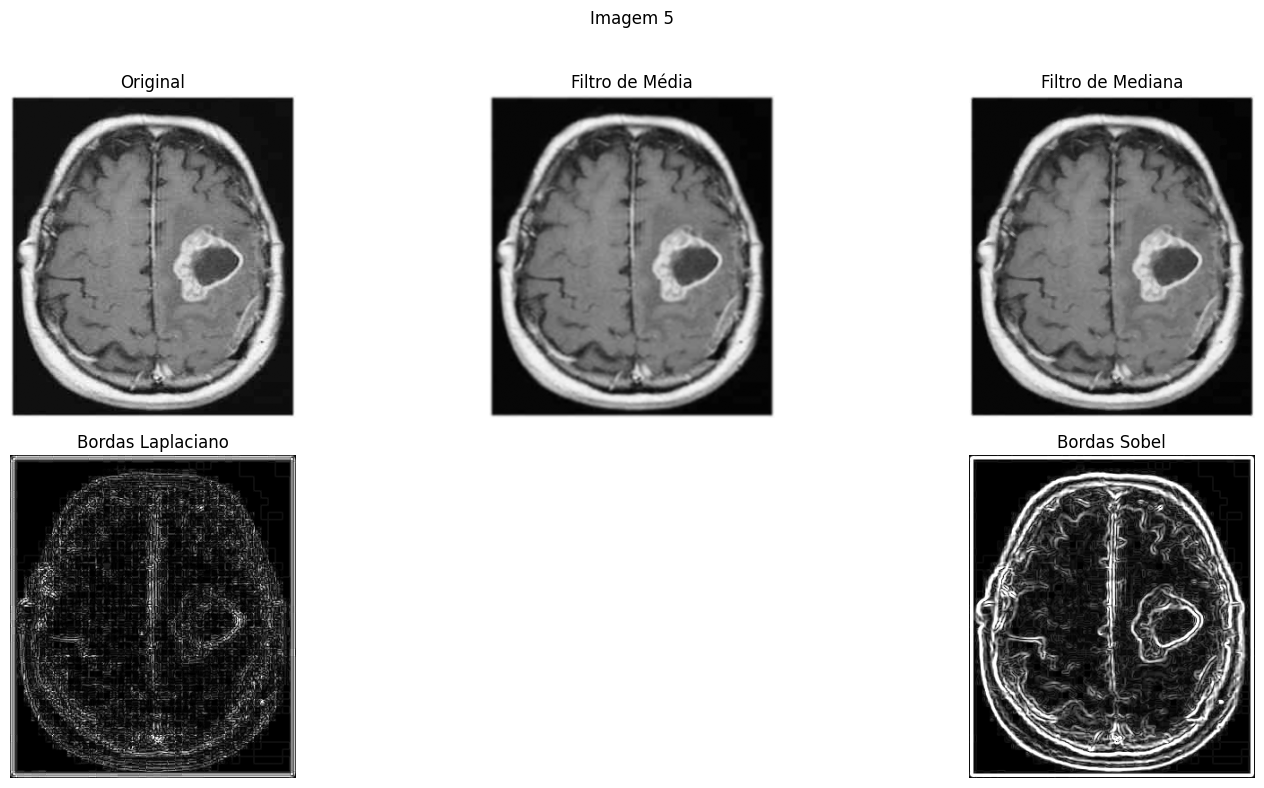

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# we will be importing 24 images
# they are named as renamed1.(png or jpg), renamed2.(png or jpg) ... renamed24.(png or jpg), ... , renamed24.(png or jpg)
images = []
for i in range(1, 25):
    img = cv2.imread(f'images/renamed{i}.png', cv2.IMREAD_GRAYSCALE)
    if img is None:
        img = cv2.imread(f'images/renamed{i}.jpg', cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Imagem renamed{i}.(png ou jpg) não encontrada. Verifique o caminho.")
    images.append(img)

def apply_laplacian_filter(img):
    """
    Aplica o filtro Laplaciano usando OpenCV para realce de detalhes.
    Retorna: bordas (laplaciano), imagem aguçada.
    """
    # Garantir que a imagem está em escala de cinza e tipo adequado
    if img.dtype != np.uint8:
        img = np.clip(img, 0, 255).astype(np.uint8)

    # Aplicar filtro Laplaciano com OpenCV
    bordas_laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
    bordas_laplacian = np.clip(np.abs(bordas_laplacian), 0, 255).astype(np.uint8)

    return bordas_laplacian

def apply_sobel_filter(img):
    """
    Aplica o filtro de Sobel para detecção de bordas usando cv2.Sobel.
    Retorna: bordas_sobel (magnitude das bordas).
    """
    # Garantir que a imagem está em escala de cinza e tipo adequado
    if img.dtype != np.uint8:
        img = np.clip(img, 0, 255).astype(np.uint8)

    # Aplicar Sobel nas direções X e Y
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # Calcular a magnitude do gradiente
    bordas_sobel = np.sqrt(sobelx**2 + sobely**2)
    bordas_sobel = np.clip(bordas_sobel, 0, 255).astype(np.uint8)

    return bordas_sobel

def apply_mean_filter(img, kernel_size=3):
    """
    Aplica o filtro de média (mean filter) para suavização da imagem.
    Retorna: imagem suavizada.
    """
    img_mean = cv2.blur(img, (kernel_size, kernel_size))
    return img_mean

def apply_median_filter(img, kernel_size=3):
    """
    Aplica o filtro de mediana (median filter) para suavização da imagem.
    Retorna: imagem suavizada.
    """
    img_median = cv2.medianBlur(img, kernel_size)
    return img_median

# Aplicar os filtros nas primeiras 5 imagens e armazenar os resultados
results = []

list = [3, 5, 17, 22, 23]
for i in list:
    img = images[i]
    mean_img = apply_mean_filter(img)
    median_img = apply_median_filter(img)
    laplacian_borders = apply_laplacian_filter(img)
    sobel_borders = apply_sobel_filter(img)
    results.append({
        'original': img,
        'mean': mean_img,
        'median': median_img,
        'laplacian_borders': laplacian_borders,
        'sobel': sobel_borders
    })

# Plotar os resultados
for i, res in enumerate(results):
    plt.figure(figsize=(15, 8))
    plt.suptitle(f'Imagem {i+1}')
    plt.subplot(2, 3, 1)
    plt.imshow(res['original'], cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(res['mean'], cmap='gray')
    plt.title('Filtro de Média')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(res['median'], cmap='gray')
    plt.title('Filtro de Mediana')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(res['laplacian_borders'], cmap='gray')
    plt.title('Bordas Laplaciano')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.axis('off')  # Remove o slot da imagem aguçada

    plt.subplot(2, 3, 6)
    plt.imshow(res['sobel'], cmap='gray')
    plt.title('Bordas Sobel')
    plt.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()